# WEEK ONE TASK

# WEEK 1 DAY 1

# 1.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
import folium

# 2.

In [2]:
police_calls = pd.read_csv('../data/police_calls_2018.csv')

police_calls.head()

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,Latitude,Longitude,geometry,zipcode,PO
0,PD201800174484,02/16/2018 07:09:00 PM,20180155542,B,93,Traffic Violation,3,CITATION - TRAFFIC,600.0,ALBANY DR,521B,H,23,36.210,-86.600,POINT (-86.59999999999999 36.21),37076,HERMITAGE
1,PD201800174650,02/16/2018 08:02:00 PM,20180155684,B,93,Traffic Violation,9,SUBJECT WARNED,5800.0,OLD HICKORY BLVD,5F34,H,21,36.169,-86.601,POINT (-86.601 36.169),37076,HERMITAGE
2,PD201800175038,02/16/2018 10:16:00 PM,20180156001,B,3,Administrative/Special Assignment,6,ASSISTED OTHER UNIT,3700.0,JAMES KAY LN,521B,H,21,36.178,-86.616,POINT (-86.616 36.178),37076,HERMITAGE
3,PD201800174217,02/16/2018 05:58:00 PM,20180155321,B,87,Safety Hazard,3,CITATION - TRAFFIC,0.0,MM 221 4 I40 E,5122,H,23,36.170,-86.591,POINT (-86.59100000000001 36.17),37076,HERMITAGE
4,PD201800173907,02/16/2018 04:19:00 PM,20180155047,B,93,Traffic Violation,9,SUBJECT WARNED,1300.0,TULIP GROVE RD,521B,H,23,36.175,-86.596,POINT (-86.596 36.175),37076,HERMITAGE


In [3]:
police_calls.tail(3)

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,Latitude,Longitude,geometry,zipcode,PO
718018,PD201800855208,08/29/2018 09:11:36 AM,20180740194,A,45,Vehicle Accident - Property Damage,1,M.P.D. REPORT COMPLED,6900.0,NOLENSVILLE PKE,3T73,S,31,35.994,-86.685,POINT (-86.685 35.994),37027,BRENTWOOD
718019,PD201800783912,08/08/2018 10:15:20 AM,0,A,43,Want Officer for Investigation / Assistance,11,DISREGARD / SIGNAL 9,0.0,HIGHWAY 70&CHEATHAM CO LINE,NaN,W,25,36.094,-87.038,POINT (-87.038 36.094),37143,PEGRAM
718020,PD201800800491,08/13/2018 11:51:29 AM,20180693242,A,96,Business Check,4,ASSISTED CITIZEN,0.0,HIGHWAY 70&CHEATHAM CO LINE,5252,W,23,36.094,-87.038,POINT (-87.038 36.094),37143,PEGRAM


In [4]:
police_calls.shape

(718021, 18)

# 3.

In [5]:
police_calls = police_calls.drop(columns = ['Event Number', 'Complaint Number', 'Block', 'Street Name', 'geometry'])

# 4.

In [6]:
police_calls = police_calls.rename (columns = {
    'Call Received' : 'call_time',
    'Shift' : 'shift',
    'Tencode' : 'tencode',
    'Tencode Description' : 'tencode_desc',
    'Disposition Code' : 'disposition',
    'Disposition Description' : 'disposition_desc',
    'Unit Dispatched' : 'unit_dispatched',
    'Sector' : 'sector',
    'Zone' : 'zone',
    'Latitude' : 'lat',
    'Longitude' : 'lng',
    'zipcode' : 'zipcode',
    'PO' : 'po'
})

In [7]:
police_calls.columns

Index(['call_time', 'shift', 'tencode', 'tencode_desc', 'disposition',
       'disposition_desc', 'unit_dispatched', 'sector', 'zone', 'lat', 'lng',
       'zipcode', 'po'],
      dtype='object')

# 5.

In [8]:
police_calls['unit_dispatched'].nunique()

2477

# 6.

In [9]:
police_calls['shift'].value_counts()

shift
B    278672
A    240728
C    168606
Name: count, dtype: int64

# 7.

In [10]:
police_calls['disposition_desc'].unique()

array(['CITATION - TRAFFIC', 'SUBJECT WARNED', 'ASSISTED OTHER UNIT',
       'GONE ON ARRIVAL', 'ASSISTED CITIZEN', 'COMMUNITY POLICING',
       'LOCATION/BUILDING SECURE', 'DISREGARD / SIGNAL 9',
       'M.P.D. REPORT COMPLED', 'ADVISED IN CIVIL CASE', 'FALSE CALL',
       'NO RESPONSE', 'ARREST, CUSTODIAL OR CITATION',
       'ASSISTANCE REFUSED', 'ADVISORY / NOTICE FORM GIVEN', nan],
      dtype=object)

# 8.

In [11]:
police_calls = police_calls.loc[~police_calls.disposition_desc.isin(['DISREGARD / SIGNAL 9', 'NO RESPONSE'])]

In [12]:
police_calls = police_calls.dropna(subset = ['disposition_desc'])

In [13]:
police_calls

,call_time,shift,tencode,tencode_desc,disposition,disposition_desc,unit_dispatched,sector,zone,lat,lng,zipcode,po
0,02/16/2018 07:09:00 PM,B,93,Traffic Violation,3,CITATION - TRAFFIC,521B,H,23,36.210,-86.600,37076,HERMITAGE
1,02/16/2018 08:02:00 PM,B,93,Traffic Violation,9,SUBJECT WARNED,5F34,H,21,36.169,-86.601,37076,HERMITAGE
2,02/16/2018 10:16:00 PM,B,3,Administrative/Special Assignment,6,ASSISTED OTHER UNIT,521B,H,21,36.178,-86.616,37076,HERMITAGE
3,02/16/2018 05:58:00 PM,B,87,Safety Hazard,3,CITATION - TRAFFIC,5122,H,23,36.170,-86.591,37076,HERMITAGE
4,02/16/2018 04:19:00 PM,B,93,Traffic Violation,9,SUBJECT WARNED,521B,H,23,36.175,-86.596,37076,HERMITAGE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
718015,07/15/2018 12:19:33 PM,A,88,Investigate 911 Hang-Up Call,5,GONE ON ARRIVAL,330A,S,31,35.995,-86.686,37027,BRENTWOOD
718016,07/16/2018 02:51:29 PM,A,93,Traffic Violation,9,SUBJECT WARNED,8F62,S,31,35.993,-86.685,37027,BRENTWOOD
718017,07/27/2018 01:24:55 AM,C,70,Burglary - Residence,13,FALSE CALL,317C,S,31,35.994,-86.685,37027,BRENTWOOD
718018,08/29/2018 09:11:36 AM,A,45,Vehicle Accident - Property Damage,1,M.P.D. REPORT COMPLED,3T73,S,31,35.994,-86.685,37027,BRENTWOOD


# WEEK 1 DAY 2

# 9.

In [14]:
tencode_count = police_calls['tencode_desc'].value_counts()

In [15]:
tencode_count = pd.DataFrame({'tencode': tencode_count.index, 'tencode_count': tencode_count.values})

In [16]:
police_calls

,call_time,shift,tencode,tencode_desc,disposition,disposition_desc,unit_dispatched,sector,zone,lat,lng,zipcode,po
0,02/16/2018 07:09:00 PM,B,93,Traffic Violation,3,CITATION - TRAFFIC,521B,H,23,36.210,-86.600,37076,HERMITAGE
1,02/16/2018 08:02:00 PM,B,93,Traffic Violation,9,SUBJECT WARNED,5F34,H,21,36.169,-86.601,37076,HERMITAGE
2,02/16/2018 10:16:00 PM,B,3,Administrative/Special Assignment,6,ASSISTED OTHER UNIT,521B,H,21,36.178,-86.616,37076,HERMITAGE
3,02/16/2018 05:58:00 PM,B,87,Safety Hazard,3,CITATION - TRAFFIC,5122,H,23,36.170,-86.591,37076,HERMITAGE
4,02/16/2018 04:19:00 PM,B,93,Traffic Violation,9,SUBJECT WARNED,521B,H,23,36.175,-86.596,37076,HERMITAGE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
718015,07/15/2018 12:19:33 PM,A,88,Investigate 911 Hang-Up Call,5,GONE ON ARRIVAL,330A,S,31,35.995,-86.686,37027,BRENTWOOD
718016,07/16/2018 02:51:29 PM,A,93,Traffic Violation,9,SUBJECT WARNED,8F62,S,31,35.993,-86.685,37027,BRENTWOOD
718017,07/27/2018 01:24:55 AM,C,70,Burglary - Residence,13,FALSE CALL,317C,S,31,35.994,-86.685,37027,BRENTWOOD
718018,08/29/2018 09:11:36 AM,A,45,Vehicle Accident - Property Damage,1,M.P.D. REPORT COMPLED,3T73,S,31,35.994,-86.685,37027,BRENTWOOD


# 10.

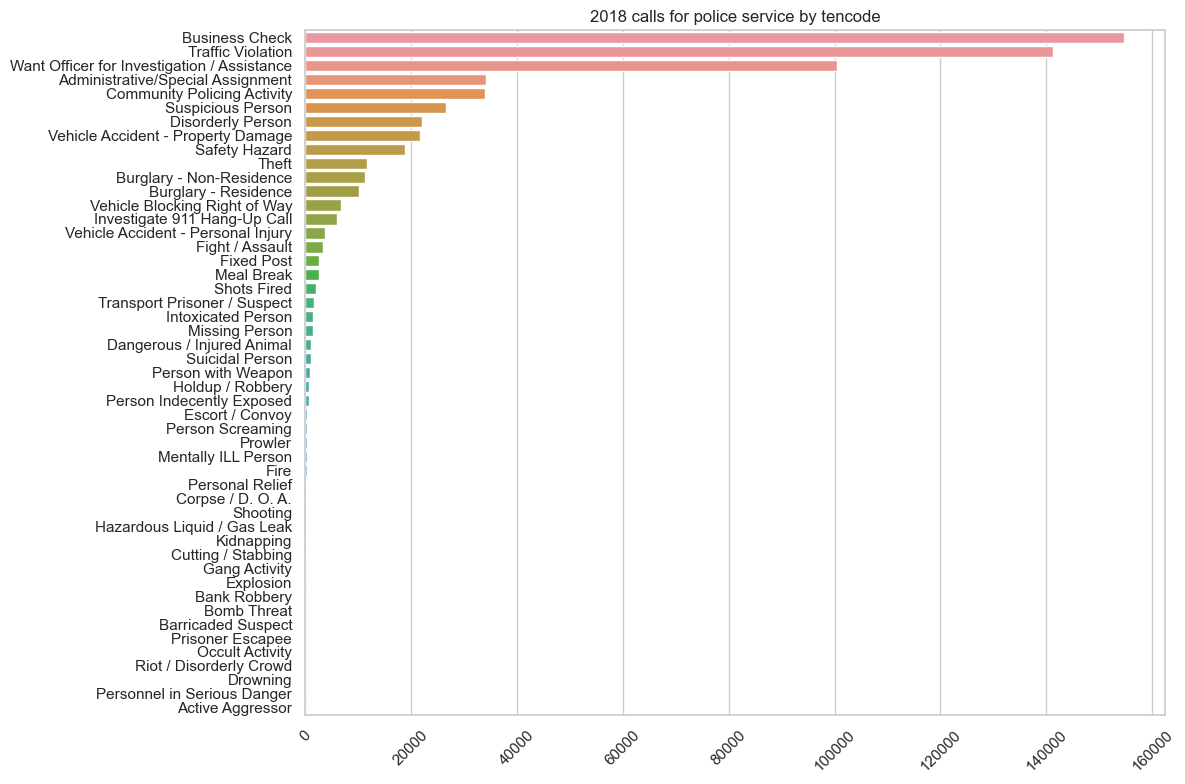

In [17]:
tencode_count['tencode_str'] = tencode_count['tencode'].apply(lambda x: ''.join(x))

plt.figure(figsize = (12, 8))                              
sns.set(style="whitegrid")                                  
sns.barplot(x = 'tencode_count', 
            y = 'tencode_str', 
            data = tencode_count)
plt.xlabel('')                                              
plt.ylabel('')                                              
plt.title('2018 calls for police service by tencode')
plt.xticks(rotation=45)
plt.tight_layout();

# 11.

In [18]:
# convert the zipcode to a string

police_calls['zipcode'] = police_calls['zipcode'].astype(str)

# count how many calls each zipcode recieved

calls_per_zipcode = police_calls["zipcode"].value_counts().reset_index()

# renaming the columns

calls_per_zipcode.columns = ['zipcode', 'call_count']

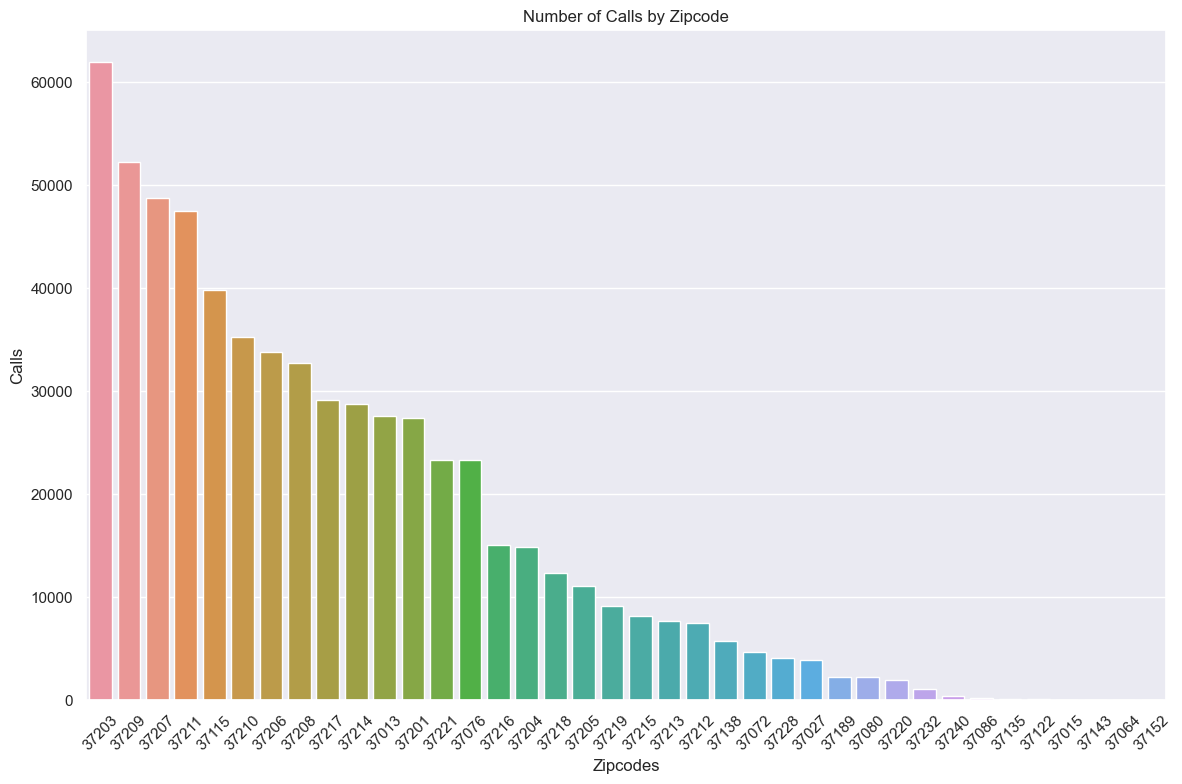

In [19]:
plt.figure(figsize = (12, 8))                              
sns.set(style='darkgrid')                                  
sns.barplot(x = 'zipcode', 
            y = 'call_count', 
            data = calls_per_zipcode)
plt.xlabel('Zipcodes')                                              
plt.ylabel('Calls')                                              
plt.title('Number of Calls by Zipcode')
plt.xticks(rotation=45)
plt.tight_layout();

# WEEK 1 DAY 3

# 12.

In [20]:
community_policing= police_calls[police_calls['tencode_desc']=='Community Policing Activity']

community_policing= community_policing['zipcode'].value_counts()

community_policing= community_policing.reset_index()

# WEEK 2 DAY 4

# 13.

In [21]:
# convert 'call_time' column to date/time format

police_calls['call_time'] = pd.to_datetime(police_calls['call_time'],  format = '%m/%d/%Y %I:%M:%S %p')

In [22]:
police_calls['month'] = police_calls['call_time'].dt.month

In [23]:
police_calls['month'].value_counts()

month
1    85094
3    79892
5    74718
8    73181
6    73098
2    72413
4    65953
7    57558
9    42934
Name: count, dtype: int64

# 14.

In [24]:
police_calls['call_time'].dt.day_name().value_counts()

call_time
Tuesday      102706
Wednesday    101700
Thursday      97885
Friday        95998
Monday        92536
Saturday      71102
Sunday        62914
Name: count, dtype: int64

# Tuesday has the most

# Sunday has the least

-----------------------------------------------------------------------------------------------------

# WEEK TWO TASK

# 15.

In [25]:
hub = pd.read_csv(r"C:\Users\Owner\Desktop\NSS_Analytics_Jumpstart\data\hubNashville_2018.csv")

In [26]:
hub

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,Zipcode,Latitude,Longitude
0,45480,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-12 14:00:20,02/12/2018 03:48:14 PM,Phone,37115.0,36.296917,-86.699162
1,45482,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-12 14:00:21,02/12/2018 03:49:13 PM,Phone,37076.0,36.215403,-86.588513
2,43742,Closed,"Trash, Recycling & Litter",Litter,Litter,2018-02-02 21:18:15,02/07/2018 05:04:33 PM,Phone,37076.0,36.187902,-86.607286
3,49069,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-23 23:27:07,02/27/2018 09:06:16 PM,hubNashville Community,37203.0,36.153761,-86.788745
4,44743,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-08 14:00:04,02/08/2018 03:01:50 PM,Phone,37210.0,36.154836,-86.763345
...,...,...,...,...,...,...,...,...,...,...,...
81161,112617,In Progress,"Streets, Roads & Sidewalks",Obstruction of right of way,Obstruction of right of way,2018-10-28 21:16:04,NaN,hubNashville Community,37220.0,36.047498,-86.749553
81162,113563,In Progress,"Streets, Roads & Sidewalks",Overgrowth on right of way,Sidewalk,2018-10-31 19:37:59,NaN,hubNashville Community,37208.0,36.161370,-86.812050
81163,114313,In Progress,"Streets, Roads & Sidewalks",Traffic Engineering,Request Markings,2018-11-05 13:02:37,NaN,Phone,37214.0,36.158931,-86.681223
81164,114808,Assigned,Property Violations,Junk and Debris,Junk and Debris,2018-11-06 18:51:18,NaN,hubNashville Community,37206.0,36.178080,-86.752980


# 16.

In [27]:
hub = hub.rename (columns = {
    'Request #' : 'request_id',
    'Status' : 'status',
    'Request Type' : 'request_type',
    'Subrequest Type' : 'subrequest_type',
    'Additional Subrequest Type' : 'add_subrequest_type',
    'Date / Time Opened' : 'opened',
    'Date / Time Closed' : 'closed',
    'Request Origin' : 'origin',
    'Zipcode' : 'zipcode',
    'Latitude' : 'lat',
    'Longitude' : 'lng'
})

In [28]:
hub

,request_id,status,request_type,subrequest_type,add_subrequest_type,opened,closed,origin,zipcode,lat,lng
0,45480,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-12 14:00:20,02/12/2018 03:48:14 PM,Phone,37115.0,36.296917,-86.699162
1,45482,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-12 14:00:21,02/12/2018 03:49:13 PM,Phone,37076.0,36.215403,-86.588513
2,43742,Closed,"Trash, Recycling & Litter",Litter,Litter,2018-02-02 21:18:15,02/07/2018 05:04:33 PM,Phone,37076.0,36.187902,-86.607286
3,49069,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-23 23:27:07,02/27/2018 09:06:16 PM,hubNashville Community,37203.0,36.153761,-86.788745
4,44743,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-08 14:00:04,02/08/2018 03:01:50 PM,Phone,37210.0,36.154836,-86.763345
...,...,...,...,...,...,...,...,...,...,...,...
81161,112617,In Progress,"Streets, Roads & Sidewalks",Obstruction of right of way,Obstruction of right of way,2018-10-28 21:16:04,NaN,hubNashville Community,37220.0,36.047498,-86.749553
81162,113563,In Progress,"Streets, Roads & Sidewalks",Overgrowth on right of way,Sidewalk,2018-10-31 19:37:59,NaN,hubNashville Community,37208.0,36.161370,-86.812050
81163,114313,In Progress,"Streets, Roads & Sidewalks",Traffic Engineering,Request Markings,2018-11-05 13:02:37,NaN,Phone,37214.0,36.158931,-86.681223
81164,114808,Assigned,Property Violations,Junk and Debris,Junk and Debris,2018-11-06 18:51:18,NaN,hubNashville Community,37206.0,36.178080,-86.752980


# 17.

In [29]:
# dropping all rows where the 'closed' column has no value

hub = hub.dropna(subset=['closed'])

In [30]:
# found an error that required me to put this in

pd.options.mode.copy_on_write = True


# converting both columns to date/time format

hub['opened'] = pd.to_datetime(hub['opened'], format = '%Y-%m-%d %H:%M:%S')

hub['closed'] = pd.to_datetime(hub['closed'], format = '%m/%d/%Y %I:%M:%S %p')

In [31]:
# creating a new column containing the time duration between the two selected columns

hub['resolution_time'] = hub['closed'] - hub['opened']

In [32]:
hub.head()

,request_id,status,request_type,subrequest_type,add_subrequest_type,opened,closed,origin,zipcode,lat,lng,resolution_time
0,45480,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-12 14:00:20,2018-02-12 15:48:14,Phone,37115.0,36.296917,-86.699162,0 days 01:47:54
1,45482,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-12 14:00:21,2018-02-12 15:49:13,Phone,37076.0,36.215403,-86.588513,0 days 01:48:52
2,43742,Closed,"Trash, Recycling & Litter",Litter,Litter,2018-02-02 21:18:15,2018-02-07 17:04:33,Phone,37076.0,36.187902,-86.607286,4 days 19:46:18
3,49069,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-23 23:27:07,2018-02-27 21:06:16,hubNashville Community,37203.0,36.153761,-86.788745,3 days 21:39:09
4,44743,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-08 14:00:04,2018-02-08 15:01:50,Phone,37210.0,36.154836,-86.763345,0 days 01:01:46


# 18.

In [33]:
# convert the opened and closed columns to datetime objects

hub['opened'] = pd.to_datetime(hub['opened'])
hub['closed'] = pd.to_datetime(hub['closed'])

In [34]:
# calculate how long a requeast was open

hub['duration'] = hub['closed'] - hub['opened']

In [35]:
# filter out all that were opened for over a year and save to df

slow_to_resolve = hub[hub['duration'] > pd.Timedelta(days = 365)]

In [36]:
# number of request

len(slow_to_resolve)

288

In [37]:
# most common type of request open for longer than a year

slow_to_resolve['request_type'].mode()[0]

'Streets, Roads & Sidewalks'

# WEEK 2 DAY 5

# 19.

In [38]:
# Create a new resolution_time_hours column by dividing the resolution_time column

resolution_time_hours = hub['resolution_time_hours'] = hub['resolution_time'] / pd.Timedelta(hours = 1)

# 20.

Text(0.5, 1.0, 'Histogram of Resolution Time')

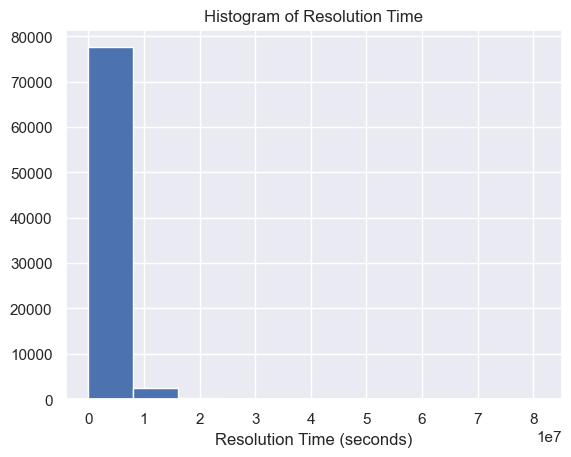

In [39]:
# you have to convert to seconds
hub['resolution_time'] = hub['resolution_time'].dt.total_seconds()

hub['resolution_time'].hist()

plt.xlabel('Resolution Time (seconds)')
plt.ylabel('')
plt.title('Histogram of Resolution Time')

# 21.

In [40]:
streets_df = hub[hub['request_type'] == 'Streets, Roads & Sidewalks']

In [41]:

streets_df.groupby('zipcode')['resolution_time_hours'].median().sort_values()

zipcode
37152.0      1.766667
37214.0     24.200000
37115.0     29.608333
37122.0     30.214306
37211.0     36.233333
37217.0     38.233333
37013.0     39.846944
37232.0     40.416667
37143.0     40.461389
37138.0     42.031389
37027.0     42.151667
37220.0     42.483333
37228.0     42.633333
37213.0     43.048333
37086.0     43.233333
37189.0     44.116667
37076.0     44.170556
37218.0     44.943194
37207.0     46.075000
37072.0     46.350000
37015.0     47.844167
37210.0     47.966667
37221.0     48.658333
37201.0     48.730833
37216.0     49.215000
37203.0     51.159861
37215.0     51.525833
37064.0     53.966944
37209.0     55.883333
37080.0     69.516667
37204.0     69.791667
37205.0     70.208333
37219.0     70.983333
37208.0     80.283333
37212.0     85.205694
37206.0     90.866667
37135.0    111.916667
Name: resolution_time_hours, dtype: float64

In [42]:
streets_df = streets_df.reset_index()

In [43]:
streets_df.head()

,index,request_id,status,request_type,subrequest_type,add_subrequest_type,opened,closed,origin,zipcode,lat,lng,resolution_time,duration,resolution_time_hours
0,0,45480,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-12 14:00:20,2018-02-12 15:48:14,Phone,37115.0,36.296917,-86.699162,6474.0,0 days 01:47:54,1.798333
1,1,45482,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-12 14:00:21,2018-02-12 15:49:13,Phone,37076.0,36.215403,-86.588513,6532.0,0 days 01:48:52,1.814444
2,3,49069,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-23 23:27:07,2018-02-27 21:06:16,hubNashville Community,37203.0,36.153761,-86.788745,337149.0,3 days 21:39:09,93.652500
3,4,44743,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-08 14:00:04,2018-02-08 15:01:50,Phone,37210.0,36.154836,-86.763345,3706.0,0 days 01:01:46,1.029444
4,5,48953,Closed,"Streets, Roads & Sidewalks",Remove Other,Remove Other,2018-02-23 19:45:16,2018-05-21 16:01:05,Phone,37205.0,36.120750,-86.840120,7503349.0,86 days 20:15:49,2084.263611


# 22.

In [44]:
population = pd.read_csv(r"C:\Users\Owner\Desktop\NSS_Analytics_Jumpstart\data\population_2018.csv")

In [45]:
population.dtypes

zipcode                       int64
population                  float64
ratio_in_davidson_county    float64
dtype: object

In [46]:
calls_per_zipcode.dtypes

zipcode       object
call_count     int64
dtype: object

In [47]:
population['zipcode']=population['zipcode'].astype(str)

In [48]:
pd.merge(population, calls_per_zipcode, how = 'outer', on = 'zipcode')

,zipcode,population,ratio_in_davidson_county,call_count
0,37013,97819.0,1.000000,27608.0
1,37015,17323.0,0.031100,70.0
2,37027,55130.0,0.256409,3892.0
3,37064,56641.0,0.001953,15.0
4,37072,32033.0,0.552683,4724.0
5,37073,14318.0,0.003126,NaN
6,37076,38957.0,0.979089,23338.0
7,37080,7349.0,0.559232,2227.0
8,37086,34223.0,0.003064,237.0
9,37115,40484.0,1.000000,39879.0


# 23.

In [49]:
calls_per_zipcode['calls_per_capita']= calls_per_zipcode['call_count']/ population['population']


In [50]:
calls_per_zipcode.sort_values('calls_per_capita', ascending = False)

,zipcode,call_count,calls_per_capita
37,37152,1,inf
26,37189,2270,22.700000
15,37204,14881,10.846210
13,37076,23338,5.727117
7,37208,32796,4.462648
14,37216,15066,3.963694
1,37209,52248,3.016106
5,37210,35232,2.460679
11,37201,27376,2.211309
4,37115,39879,1.244935


# WEEK 2 DAY 6

# 24.

In [51]:
conn = sql.connect(r"C:\Users\Owner\Desktop\NSS_Analytics_Jumpstart\data\metro_survey.db")
cur = conn.cursor()

In [52]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;")

available_tables = (cur.fetchall())

available_tables

[('codes',),
 ('equality_and_access',),
 ('general_services',),
 ('info',),
 ('overall',),
 ('recreation',),
 ('safety',),
 ('transportation',)]

# WEEK 2 DAY 7

# 25.

In [53]:
query = '''
SELECT *
FROM safety
INNER JOIN info
ON safety.Id = info.Id;
'''

results = pd.read_sql(query, conn)

results

,Id,Crime Prevention,Police - Overall,Fire and EMS - Overall,Police Visibility,Traffic Enforcement,Police Professionalism,Police Response Time,Fire Services,Fire Response Time,...,ZIP Code,Quality of Life,Overall Feeling of Safety,Neighborhood Safety,Neighborhood Appearance,Nashville as Residence,Nashville as Place to Raise Children,Nashville as Workplace,Nashville as Retirement Place,Gender Identity
0,1,Very Dissatisfied,Very Dissatisfied,Satisfied,Neutral,Neutral,Neutral,Dissatisfied,Neutral,Very Satisfied,...,37208,Neutral,Neutral,Neutral,Satisfied,Neutral,Good,Neutral,Neutral,Female
1,2,Dissatisfied,Satisfied,Very Satisfied,Satisfied,Dissatisfied,Satisfied,Don't Know,Satisfied,Don't Know,...,37211,Satisfied,Satisfied,Satisfied,Satisfied,Good,Good,Good,Good,Female
2,3,Neutral,Neutral,Satisfied,Neutral,Satisfied,Neutral,Satisfied,Don't Know,Don't Know,...,37208,Very Satisfied,Neutral,Satisfied,Satisfied,Excellent,Excellent,Excellent,Excellent,Male
3,4,Satisfied,Very Satisfied,Don't Know,Satisfied,Satisfied,Very Satisfied,Don't Know,Don't Know,Don't Know,...,37203,Satisfied,Very Satisfied,Satisfied,Satisfied,Excellent,Don't Know,Excellent,Don't Know,Male
4,5,Don't Know,Neutral,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,...,37138,Satisfied,Satisfied,Satisfied,Satisfied,Good,Good,Good,Good,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2166,2167,Neutral,Neutral,Neutral,Neutral,Satisfied,Don't Know,Don't Know,Don't Know,Don't Know,...,37203,Satisfied,Satisfied,Satisfied,Satisfied,Good,Good,Excellent,Good,Female
2167,2168,Dissatisfied,Satisfied,Satisfied,Neutral,Neutral,Satisfied,Neutral,Satisfied,Satisfied,...,37027,Satisfied,Dissatisfied,Satisfied,Very Satisfied,Good,Good,Good,Good,Female
2168,2169,Neutral,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Neutral,Neutral,Neutral,...,37209,Satisfied,Satisfied,Satisfied,Satisfied,Good,Good,Good,Neutral,Male
2169,2170,Neutral,Dissatisfied,Satisfied,Dissatisfied,Dissatisfied,Dissatisfied,Satisfied,Satisfied,Satisfied,...,37217,Neutral,Satisfied,Satisfied,Dissatisfied,Good,Good,Good,Good,Male


In [54]:
safety_exp = pd.read_sql(query, conn)

In [55]:
safety_exp.head()

,Id,Crime Prevention,Police - Overall,Fire and EMS - Overall,Police Visibility,Traffic Enforcement,Police Professionalism,Police Response Time,Fire Services,Fire Response Time,...,ZIP Code,Quality of Life,Overall Feeling of Safety,Neighborhood Safety,Neighborhood Appearance,Nashville as Residence,Nashville as Place to Raise Children,Nashville as Workplace,Nashville as Retirement Place,Gender Identity
0,1,Very Dissatisfied,Very Dissatisfied,Satisfied,Neutral,Neutral,Neutral,Dissatisfied,Neutral,Very Satisfied,...,37208,Neutral,Neutral,Neutral,Satisfied,Neutral,Good,Neutral,Neutral,Female
1,2,Dissatisfied,Satisfied,Very Satisfied,Satisfied,Dissatisfied,Satisfied,Don't Know,Satisfied,Don't Know,...,37211,Satisfied,Satisfied,Satisfied,Satisfied,Good,Good,Good,Good,Female
2,3,Neutral,Neutral,Satisfied,Neutral,Satisfied,Neutral,Satisfied,Don't Know,Don't Know,...,37208,Very Satisfied,Neutral,Satisfied,Satisfied,Excellent,Excellent,Excellent,Excellent,Male
3,4,Satisfied,Very Satisfied,Don't Know,Satisfied,Satisfied,Very Satisfied,Don't Know,Don't Know,Don't Know,...,37203,Satisfied,Very Satisfied,Satisfied,Satisfied,Excellent,Don't Know,Excellent,Don't Know,Male
4,5,Don't Know,Neutral,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,...,37138,Satisfied,Satisfied,Satisfied,Satisfied,Good,Good,Good,Good,Female


In [56]:
safety_exp = safety_exp[['ZIP Code', 'Police - Overall']] 

In [57]:
safety_exp.head(2)

,ZIP Code,Police - Overall
0,37208,Very Dissatisfied
1,37211,Satisfied


safety_exp = query = '''
SELECT `Police - Overall`, `ZIP Code`
FROM safety
INNER JOIN info
ON safety.Id=info.Id

'''
safety_exp = pd.read_sql(query, conn)
safety_exp.head()

sql_query = '''
SELECT info."ZIP Code", safety."Police - Overall"
FROM safety
INNER JOIN info 
ON safety.Id = info.Id;
'''

# 26.

<Axes: xlabel='Police - Overall'>

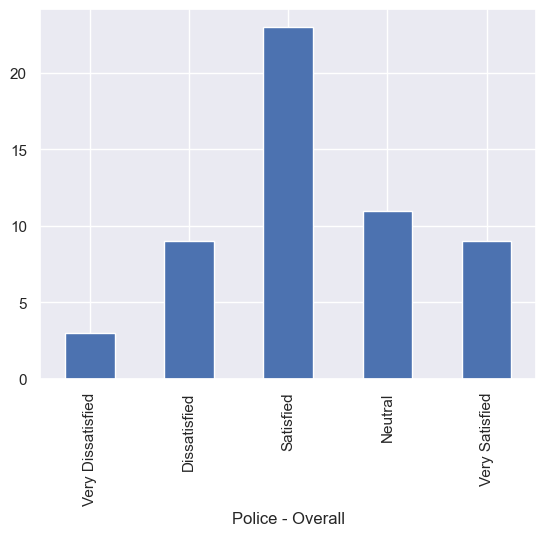

In [58]:
safety_exp[safety_exp['ZIP Code']== 37203]['Police - Overall'].value_counts()[['Very Dissatisfied', 'Dissatisfied', 'Satisfied', 'Neutral', 'Very Satisfied']].plot(kind='bar')

sql_query_37203 = '''
SELECT "Police - Overall"
FROM safety
INNER JOIN info 
ON info.Id = safety.Id
WHERE info."ZIP Code" = '37203';
'''

# 27.

In [59]:
query = """
SELECT info."ZIP Code", general_services."Streets and Sidewalks - Overall"
FROM general_services
JOIN info ON general_services.Id = info.Id
WHERE info."ZIP Code" = 37203;
"""

results = pd.read_sql(query, conn)

results

,ZIP Code,Streets and Sidewalks - Overall
0,37203,Satisfied
1,37203,Neutral
2,37203,Very Satisfied
3,37203,Satisfied
4,37203,Dissatisfied
5,37203,Neutral
6,37203,Very Dissatisfied
7,37203,Very Dissatisfied
8,37203,Dissatisfied
9,37203,Satisfied


In [60]:
streets_sidewalks_exp = pd.read_sql(query, conn)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Dissatisfied'),
  Text(1, 0, 'Neutral'),
  Text(2, 0, 'Satisfied'),
  Text(3, 0, 'Very Dissatisfied'),
  Text(4, 0, 'Very Satisfied'),
  Text(5, 0, "Don't Know")])

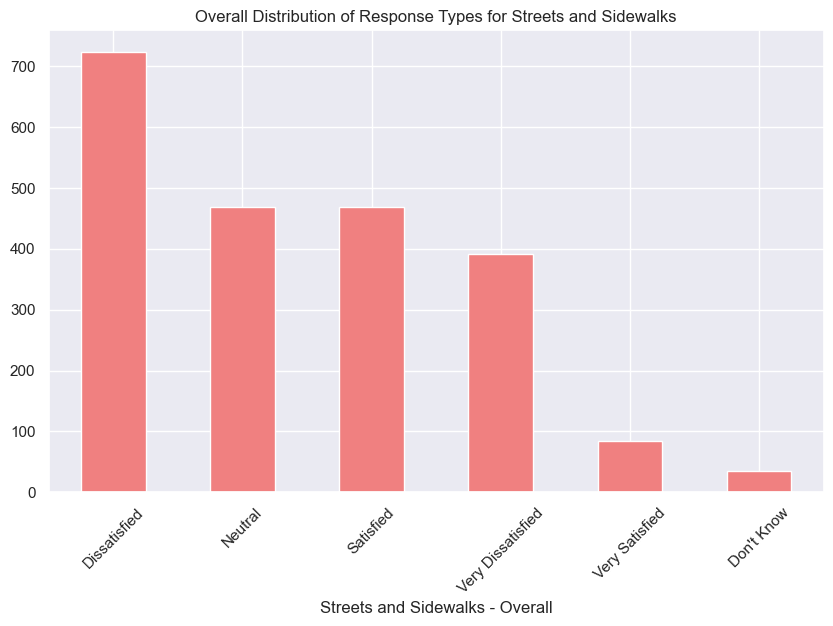

In [61]:
plt.figure(figsize=(10, 6))
general_services_df = pd.read_sql_query("SELECT * FROM general_services", conn)
general_services_df['Streets and Sidewalks - Overall'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Overall Distribution of Response Types for Streets and Sidewalks')
plt.xticks(rotation=45)

# 28. / 29.

In [62]:
nash_map = folium.Map(location = [36.1612, -86.7775], zoom_start=12)

nash_map

# 30.

In [63]:
# extract latitude, longitude, request_type, and resolution_time from the current row

for index, row in slow_to_resolve.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    request_type = row['request_type']
    resolution_time = row['resolution_time']

In [64]:
# create a location for the hubNashville request

location = [latitude, longitude]

In [65]:
# create a popup with information about the request type and resolution time

popup = f"Request Type: {request_type}<br>Resolution Time: {resolution_time}"

In [66]:
# create a marker using the folium Marker() constructor

marker = folium.Marker(location=location, popup=popup)

In [67]:
# add the marker to the nash_map

marker.add_to(nash_map)

In [68]:
nash_map